# Statistical Inference and Confidence Intervals

### Learning Objectives
- Explain the relationships among parameter, sample, statistic, and population.
- Define and describe sampling distribution.
- Describe the Central Limit Theorem.
- Generate and interpret a theoretical confidence interval.
- Bonus: Generate and interpret a bootstrapped confidence interval.

## Video Game Example
Let's say you are playing a video game (like "Halo" or "Call of Duty") where the *goal is to kill your opponent*. Additionally, let's say your *opponent is invisible*.

When deciding which weapon to use, you have two options: 
- a *sniper* rifle with *one bullet* in it, or
- a *grenade* launcher with *one grenade* in it. 

<details><summary>Which weapon would you prefer? (we have to be really smart with out choice, we don't have much..)</summary>
    
- You're likely going to prefer the grenade launcher!
- Why? Well, an explosion from a grenade will cover more area than one bullet fired from a rifle. So, naturally, we would be CONFIDENT to go with the grenade option!

![](../images/halo3.gif)
</details>

This is the same as the logic behind **confidence intervals**. By calculating a statistic on a sample, ***maybe*** we get lucky and our *statistic (MEASURE OF SAMPLE) is exactly equal to our parameter (MEASURE OF POPULATION)*... however, we're probably not going to get this lucky.

Let's see an example of that.

## Polling Example

You're running for office in a small town of 1,000 voters. Everyone in your town cares deeply about voting, so all 1,000 of them are going to vote.

You'd like to ask "All in all, do you think things in the nation are generally headed in the right direction?"

In [1]:
# Import NumPy.
import numpy as np

# Set a seed so we get the same results over repeated evaluations.
np.random.seed(42)

In [2]:
# We are simulating a population of 1,000.
# With each person having a 40% chance of answering this to our question-
# "Yes, things are headed in the right direction."
# shift+tab to see specifics - if we defined only p=0.4 (40% success) and size=1000 (1,000) voters
# we'll get an error. need to specify n (number of trials)=1 (representing experiment in 1 town)

population = np.random.binomial(n = 1, p = 0.4, size = 1000)

len(population) 

1000

Recap that Binomial distribution is a type of discrete (countable outcomes) distribution that can be used to represent the likely distribution of outcomes from like a coin toss experiment repeated several times (instead of just once, when it will straight-forwardly just be a head or tail, a Bernoulli's distribution)
- we will receive responses from 1,000 voters here, so this is countable/discrete
- we do a repeated collection of response collection for the same question from 1,000 different voters, independent of each other, so this is Binomial

In [3]:
# let's look at the 1st 10 elements 
population[:10] # we have a 1-D array with total 1,000 values

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [4]:
(population == 1).sum()

387

In [5]:
np.mean(population) # ~40%, 387/1000

0.387

Above, we simulated a **POPULATION** of people where *40% of them think the country is headed in the right direction*. 

**But your campaign doesn't know this. Your campaign wants to learn what the true value of $p$ is!**

The problem is, you don't have enough money and time to call all 1,000 of them. *You can only call 50 people* --> This 50, which is a subset of the entire population of 1,000 voters, then becomes your **SAMPLE**

In [6]:
# draw random sample of 50 from the simulated population above of 1,000
# replace is set to False because we do not want to repeat the same voter in the sampled 50
sample = np.random.choice(population,
                          size = 50,
                          replace = False)

In [7]:
len(sample)

50

In [8]:
(sample==1).sum()

19

In [9]:
np.mean(sample) # ~38% favorable votes inside sample. representative of what we saw in population 

0.38

In [10]:
# generating a 2nd sample
sample_2 = np.random.choice(population,
                            size = 50,
                            replace = False)
np.mean(sample_2)

0.44

In [11]:
# generating a 3rd sample
sample_3 = np.random.choice(population,
                            size = 50,
                            replace = False)
np.mean(sample_3)

0.38

In [12]:
# generating a 4th sample
sample_4 = np.random.choice(population,
                            size = 50,
                            replace = False)
np.mean(sample_4)

0.38

In [13]:
# generating a 5th sample
sample_5 = np.random.choice(population,
                            size = 50,
                            replace = False)
np.mean(sample_5)

0.32

#### Even if we randomly sample, *we aren't guaranteed to get a good sample* (an exact replication of our population)!
What if the 50 voters that we sampled were as per sample 5? the variation is ~6% from what we see on population with ~38% success.

<details><summary>How do we get around this?</summary>
    
![](../images/halo3.gif) By switching to our grenade launcher.
    

</details>

When a poll is reported, you likely see something like this:

![](../images/polling.png)

In the upper-right corner, you can see "$\text{margin of error }\pm\text{ }3.1$". 

#### What is a margin of error?
This means that it's pretty likely that these poll results are *within "plus or minus 3.1%" of the real value*.

#### Why is there a margin of error?
We recognize that **one sample of 50 people can't definitively speak for all registered voters**! We proved that with our simulation above, some samples like sample_5 can be quite off from representing the actual population results. If I had taken a different sample of 50 people, then my results might be pretty different. We hope not, but it's entirely possible.

The **margin of error** is a way for us to describe (or quantify) our **uncertainty in our statistic based on how much our statistic changes from one sample to another sample**.
- Realistically, we only pull *one sample* of size $n$ out of all possible samples of size $n$.
- We only see one sample percentage out of all possible statistics.
- We won't ever actually **see** the sample-to-sample variability!
    - This makes sense, right? It doesn't make sense for me to take ten samples of size 50... instead, I would just take one sample of 500!
    
#### If we don't ever actually observe how much our statistic changes from one sample to another sample, then how can we get a margin of error?

There are *two* ways to do this: ***either a theoretical or an empirical approach***
- We can get theory to do it. (i.e. relying on statistics and probability theory) --> theoretical approach vs
- We can estimate it empirically from our existing data. --> empirical approach *(by means of observation/experience than theory)*

## Confidence Interval Based on Theory

By quantifying the margin of error, we can construct what is known as a **confidence interval**. As the term *positively* suggests, it can be thought of whatever is ***outside*** the margin of error, because that is a quantification of a sample's confident representation of a population. Formally, this is the definition:

***A confidence interval is a set of likely values for the parameter of interest.***

--- 

<details><summary>If I could theoretically plot all possible sample percentages and how frequently I see each sample percentage... what is this?</summary>

- This is the distribution of all sample percentages!
- This is known as the **sampling distribution**.
</details>

Luckily, there is a theoretical result about this exact thing!

### The Central Limit Theorem
The Central Limit Theorem is **the most important theorem** in all of statistics. It states:

As the size of our sample $n$ gets closer and closer to infinity, our sampling distribution (the distribution of all possible sample means) approaches a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$. We saw this happening graphically in our Week 3 lesson.

**In English**: This means that if I take a sample of size $n$ and find the **mean of that sample**, then **repeat the same for all possible samples of size $n$**, this ***distribution of sample means should be Normally distributed*** as long as $n$ is big enough.

**Practically**: If I want to study the sample mean (or the sample percentage), I can **use the Normal distribution to generate a confidence interval**, as long as the size of our sample $n$ is large enough! We can use this for our our case study previously covered where we were sampling 50 voters and computing the sample means.

### Confidence Interval Formula

The formula for a confidence interval is:

$$
\text{[sample statistic]} \pm \text{[multiplier]} \times \text{[standard deviation of sampling distribution]}
$$

- The **sample statistic** is the *statistic* of our sample! *(like sample mean, for example)*
- The **standard deviation of the sampling distribution** quantifies that *sample-to-sample variability* for us. It is calculated as the std dev of one sample by the sq.root of n sample size (This is commonly called the [standard error](https://stattrek.com/estimation/standard-error.aspx).)
- The **multiplier** is a number drawn from the Normal distribution that makes sure our *confidence interval is appropriately wide* given how confident we want to be in our result.
    - The **margin of error** is the multiplier times the standard deviation of the sampling distribution. *(the latter part of the above equation)*

*Extra:* To learn about the derivation of the confidence interval for a given confidence level, [head here](http://dsearls.org/courses/M120Concepts/ClassNotes/Statistics/530G_Derivation.htm).

--- 

Example: I want to find the **95% confidence interval** for the percentage of people who think the nation is on the right track.

From above definitions, this 95% will be our ***multiplier*** substitution right?

So, we can rewrite the confidence interval formula as below, also substituting for ***std dev that we know from normal distribution***:

$$
\begin{eqnarray*}
\text{[sample statistic] } &\pm& \text{[multiplier] } \times \text{[standard deviation of sampling distribution]} \\
\bar{x} &\pm& z^* \times \frac{\sigma}{\sqrt{n}} \\
\Rightarrow \bar{x} &\pm& 1.96 \times \frac{\sigma}{\sqrt{n}}
\end{eqnarray*}
$$


Note: For a confidence interval, our multiplier is 1.96. The number 1.96 comes from a standard Normal distribution.
- The area under the standard Normal distribution between **-1.96 and +1.96** is ***95%***.
- For 90% confidence, use multipler: 1.645.
- For 99% confidence, use multipler: 2.576.

*[Extra read](https://www.statisticshowto.com/probability-and-statistics/confidence-interval/)* on how these numbers came about for those interested to know further about z-tables, z-scores

**Important Tip:** Most of the time in the industry when we calculate confidence intervals, we only calculate the 95% confidence interval. So just remember the number 1.96 for 95% confidence!

In [16]:
# defining variables for confidence interval calculation
sample_mean = np.mean(sample) # sample's average statistic
sigma = np.std(sample) # measure of the amount of variation of the values in sample
n = len(sample) # sample's length, we created this previously with np.random.choice(size=50)

print(f'sample_mean: {sample_mean}, sigma: {sigma}, n: {n}')

sample_mean: 0.38, sigma: 0.4853864439804639, n: 50


In [17]:
# substituting in confidence interval formula (for NEGATIVE multiplier):
sample_mean - 1.96 * sigma / (n ** 0.5)

0.2454577419544328

In [18]:
# rounding above result to 4 decimals
round(sample_mean - 1.96 * sigma / (n ** 0.5), 4)

0.2455

In [19]:
# substituting in confidence interval formula (for POSITIVE multiplier):
# and rounding to 4 decimals
round(sample_mean + 1.96 * sigma / (n ** 0.5), 4)

0.5145

Our 95% confidence interval for the percentage of people who think our country is on the right track, from above, is thus: **(24.55%, 51.45%)**.

#### Interpretation 
(*this will come up in interviews - some tips for your later read*)

In general: **"With confidence level 95%, the true population mean lies in the confidence interval."**

For this example: **"With confidence level 95%, the true population percentage of people who think our country is on the right track is between 24.55% to 51.45%."**
- Generally, we would say:
    - "I am {confidence level}% confident 
    - that the true population {parameter} 
    - is between {lower confidence bound} and {upper confidence bound}."

---

Two common misconceptions:

1. There is *not* a 95% probability that the true parameter lies within a particular confidence interval. **Make sure you do not use the word probability**! Instead, ***we are confident*** that over a large number of samples, 95% of them will contain the population statistic.

2. As the number of samples increases, the standard deviation of the sampling distribution decreases. However, a small standard deviation by itself does not imply that the mean is accurate. (For example, units matter!)

---

Let's write a function called `conf_int()` to take in an array of data and return a 95% confidence interval. Run your function on the *2nd sample* we generated from population previously, (`sample_2`) and interpret your results.

In [20]:
# creating a custom function to define variables for confidence interval calculation as above
def conf_int(data):
    sample_mean = np.mean(data)
    sigma = np.std(data)
    n = len(data)
    
    return (round(sample_mean - 1.96 * sigma / (n ** 0.5), 4), 
            round(sample_mean + 1.96 * sigma / (n ** 0.5), 4))

In [21]:
conf_int(sample_2)

(0.3024, 0.5776)

<details><summary>Interpretation:</summary>"I am 95% confident that the true population percentage of people who believe our country is on the right track is between 30.24% and 57.76 percent."</details>

---

#### This seems straightforward enough... why don't we always just "use theory?"
- The "standard deviation of the statistic" formula is easy when we're *generating confidence intervals for one mean or one percentage*.
- That formula gets more *complicated if we want to calculate a confidence interval for a correlation coefficient, for the difference between two means*, or for something else.
- Also, the Central Limit Theorem above describes how sample means work. *Relying on the Normal distribution is tough when our sample size $n$ is small (below 30) or when we're calculating something other than basic means and percentages*.

# To sum up:
- Our goal is usually to learn about a population.
- Oftentimes, money, time, energy, and other constraints prevent us from measuring the entire population directly.
- We take a sample from this population and calculate a statistic on our sample.
- We want to use this sample statistic to understand our population parameter!
- By just calculating a statistic, we're effectively using our sniper rifle. Instead, we want a grenade launcher!
- The statistical equivalent of a grenade launcher is a **confidence interval**. A confidence interval is a set of likely values for the parameter of interest.
- In order to construct our confidence interval, we use our sample statistic and attach a margin of error to it. We can then quantify how confident we are that the true population parameter is inside the interval.
- The formula for any confidence interval is given by $\text{[sample statistic] } \pm \text{[multiplier] } \times \text{[standard deviation of sampling distribution]}$.
- The formula for a 95% confidence interval for sample means or proportions is $\bar{x} \pm 1.96\frac{\sigma}{\sqrt{n}}$.
- I would interpret a 95% confidence interval $(a,b)$ as follows:
    - "I am 95% confident that the true population parameter is in between $a$ and $b$."

## BONUS: Margin of Error Based on our Data
--- 

In the last section, we relied on the Central Limit Theorem to tell us what the sampling distribution would look like under certain conditions.

In this section, we're just going to *directly estimate a confidence interval* by simulating our sampling distribution. This involves a process called **bootstrapping**.

### Bootstrapping
The idea behind bootstrapping is very simple.

We can get the true sampling distribution if we got all possible samples of size $n$ from our population... but this isn't realistic.

We can **simulate** the true sampling distribution by taking lots of samples of size $n$ from our **sample**.

1. Take a sample of size $n$ from the population.
2. Pretend like this sample of size $n$ is your actual population.
3. Take many samples (say $k$) of size $n$ from your **sample**. You must take these samples with replacement, or you'll just be making copies of your sample!
    - You have now generated $k$ **bootstrapped *samples***.
4. On each bootstrapped sample, calculate the statistic of interest.
    - You have now generated $k$ **bootstrapped *statistics***.

If $k$ is large enough, then your simulated sampling distribution should look somewhat like the true theoretical sampling distribution!

#### Example: Find a 95% bootstrapped confidence interval for the proportion of people who believe the country is headed in the right direction.

In [22]:
# recap our sample which is a subset of size 50 from our actual population of 1,000
print(len(sample))
sample

50


array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1])

Previously, we generated `5` different samples (sample, sample_1..sample5), each of size, `n`= 50 from `population`. 

Now, going with what we've covered under **Bootstrapping**, we'll take `k` samples of size `n`= 50 from `sample` (not population) 

In [28]:
# Instantiate an empty list of bootstrapped statistics.
bs_stats = []

# We'll do k = 1000 bootstrapped samples.
for i in range(1000):
    
    # Create a sample of size n = 50 *with replacement* from SAMPLE.
    bootstrapped_sample = np.random.choice(sample, size = 50, replace = True)
    
    # Calculate the SAMPLE statistic.
    bootstrapped_stat = np.mean(bootstrapped_sample)
    
    # Add the SAMPLE statistic to the list.
    bs_stats.append(bootstrapped_stat)

print(len(bs_stats))
bs_stats[:10] # taking a look at 1st 10 elements

1000


[0.44, 0.4, 0.26, 0.24, 0.36, 0.52, 0.32, 0.3, 0.4, 0.38]

Let's visualize the distribution of bootstrapped statistics and compare it to the theoretical sampling distribution.

In [24]:
import matplotlib.pyplot as plt
import scipy.stats as stats

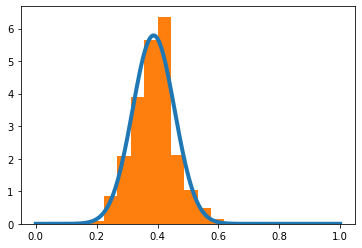

In [29]:
# Generate 200 equally-spaced values between 0 and 1.
p = np.linspace(0,1,200) # start, stop, number of numbers to generate between 0 and 1

# Plot the Normal pdf with the mean and standard deviation of our population
# this creates a line plot
plt.plot(p,stats.norm.pdf(p, loc = np.mean(population), scale = np.std(population)/(50 ** 0.5)), lw = 4)
# scale above is sigma by sq.root n = 50

# Plot a histogram of our bootstrapped statistics.
plt.hist(bs_stats, bins = 10, density = True);

Visually, the theoretical distribution looks almost identical to the bootstrapped distribution. Let's compare how different the 95% confidence intervals are.

Since we are not using the theoretical approach described under the Central Limit Theorem, we'll just use `np.percentile()` function to compute % at 2.5th percentile and 97.5th percentile to be indicative of 95% confidence interval. 

In [30]:
# Pull the 2.5th percentile from our bootstrapped statistics.
np.percentile(bs_stats, 2.5)

0.26

In [31]:
# Pull the 97.5th percentile from our bootstrapped statistics.
np.percentile(bs_stats, 97.5)

0.54

The bootstrapped 95% confidence interval is (0.26, 0.52).

<details><summary>Interpretation (we interpret it in the same way!)</summary>
We are 95% confident that the true population percentage of people who believe the country is headed in the right direction is 26% to 52%.
</details>

In [32]:
# Theoretical Interval based on our earlier custom defined function
conf_int(sample)

(0.2455, 0.5145)

The bootstrapped 95% confidence interval is (0.2455, 0.5145).

<details><summary>Interpretation</summary>
We are 95% confident that the true population percentage of people who believe the country is headed in the right direction is 24.55% to 51.45%.
</details>

<details><summary> Extra Practice: From the polling example with the 3.1% margin of error above, what are the population, sample, statistics, and parameters? </summary>
    
- Our **population** is all registered voters.
- Our **sample** is the 1,000 voters who were polled for this situation. 
- Our **statistic** is: 
    - the sample percentage of "right direction" responses, $\hat{p}_{right} = 0.38$,
- Our **parameter** is:
    - the true population percentage of "right direction" responses, $p_{right}$.
</details>